In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

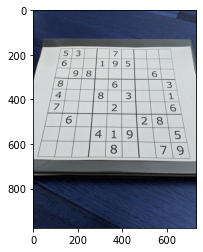

In [44]:
test_image  = cv2.imread('test_image.jpg')
plt.imshow(test_image)

In [45]:
def process_image(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img,(5,5),1)
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    return img

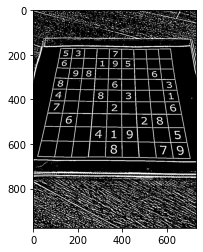

In [46]:
processed_image = process_image(test_image)
plt.imshow(processed_image, cmap='gray')

In [47]:
def sudoku_contour(img):
    contours, hirarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    return contours

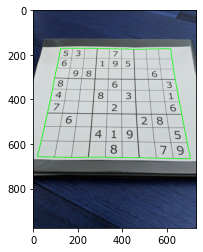

In [48]:
contour = sudoku_contour(processed_image)
cv2.drawContours(test_image, contour, 0, (0, 255, 0), 2)
plt.imshow(test_image)


In [49]:
largest_contour = np.squeeze(contour[0])
sums = [sum(i) for i in largest_contour]
differences = [i[0] - i[1] for i in largest_contour]

top_left = np.argmin(sums)
top_right = np.argmax(differences)
bottom_left = np.argmax(sums)
bottom_right = np.argmin(differences)

corners = [largest_contour[top_left], largest_contour[top_right], largest_contour[bottom_left], largest_contour[bottom_right]]

In [50]:
(tl, tr, br, bl) = corners
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
dst = np.array([[0, 0], [maxWidth - 1, 0], [maxWidth - 1, maxHeight - 1], [0, maxHeight - 1]], dtype = "float32")
M = cv2.getPerspectiveTransform(np.float32(corners), dst)
warped_image = cv2.warpPerspective(test_image, M, (maxWidth, maxHeight))

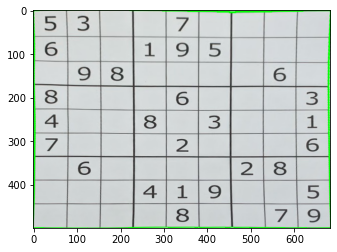

In [51]:
plt.imshow(warped_image)

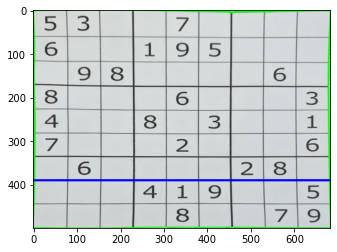

In [53]:
minLineLength = 100
maxLineGap = 10
gray = cv2.cvtColor(warped_image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),1)
edges = cv2.Canny(blur,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(warped_image,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(warped_image)